# INTRODUCTION

Decades ago, a friend of mine exposed me to a stock market ecosystem called Technical Analysis, known as "TA".

Until then, I had assumed that stock prices are only influenced by revenue, profit, and cash flow forecasts — published by stock analysts. In other words, I had assumed that a stock price would only be driven by the outlook of a company's real-world business growth and financial result forecasts.

Instead, Technical Analysis is a methodology of forecasting the direction of securities prices, based on a statistical study of past trends: historical market data, primarily Price and Volume. In other words, Technical Analysis focuses on how the stock market reacts to "itself", in other words, the security's price and volume pattern, instead of the company's growth fundamentals.

And my friend gave me another interesting insight: I learned that each Technical Analyst chooses a personal subset of TA tools. Technical Analysts are even willing to reveal their own tool collection, because truly successful Technical Analysts don't copy each other.

In other words, each successful Technical Analyst chooses a set of tools, based on his or her own personal mental favor and bias. Wow!

I didn't pursue a career in Technical Analysis (I went into investment banking and business development consulting.) But, when I read Thinkful's "Capstone Analytic Report and Research Proposal" requirements, suddenly Technical Analysis re-blossomed in my mind. 

I had always wondered whether any Technical Analysis tools consistently deliver profits. So, my intuition drove me to run a profitability analysis on the single most popular Technical Analysis tool: it's called **Moving Average.**



# DESCRIPTION OF DATASET

## What does your data contain, and what is its background?

There's a stock index that's widely regarded as the best gauge of large-cap U.S. equities: Standard & Poor's 500 Index (S&P 500) which is a market-capitalization-weighted index of the 500 largest U.S. publicly traded companies.

As well, the stock market is frequently broken down into 11 major sectors, which represent key areas of the economy: Materials, Energy, Financials, Industrials, Technology, Consumer Staples, Real Estate, Utilities, Health Care, Consumer Discretionary, Telecommunications.

I was able to access publicly available 5 years of traded securities data … from January 2014 to December 2018. For each security, the data are in 1256 rows and in 7 columns. 

The column titles are: *Date, Open, High, Low, Close, Adj Close, Volume*

To analyze the profit or loss from using Moving Average, my code will only focus on the Date and Close columns.

## Where does your data come from?

My data comes from Yahoo Finance, at https://finance.yahoo.com

## Why is it interesting or significant?

One of the most popular Technical Analysis tools, is the Moving Average: a dynamic trend-line, a calculation to analyze data points by creating a series averages of different subsets of the full data set. The subsets are "rolling over time". 

The typical Moving Average graphic approach is to chart the 50-day Moving Average and the 200-day Moving Average, along with the Closing Price. The "Simple Moving Averages" are symbolically referred to as SMA(50) and SMA(200).

When those two Moving Averages intersect (upward or downward), then it's a popular signal of an upcoming trend.

Those two moving averages are frequently visible on publicly published charts.

## Summary statistics

I use two Simple Moving Averages: 50 trading days, and 200 trading days.

SMA(50) averages the past 50 days' closing prices

SMA(200) averages the past 200 days' closing prices


SMA(50) = (A50 + A49 + … + A1)/50

SMA(200) = (A200 + A199 + … + A1)/200

where the symbol "A" simply represents the Closing Price on each past trading day.

## Visualizations of the particular variables from the dataset that you will use

The following online chart is an example of a chart containing the two popular Moving Averages, published by StockCharts.com

This is a very, very routine stock chart.


In [11]:
from IPython.display import Image

In [16]:
Image(url='http://cns.bu.edu/~gsc/CN710/fincast/Technical%20_indicators/Moving%20Averages_files/mova1-5ibm.png')

# THREE ANALYTIC QUESTIONS

### QUESTION 1

* If a user **buys** a security based onthe S&P 500 index, when the 50-day Moving
Average crosses **above** the 200-day Moving Average ...
  
* ... and then if the user **sells** that same security when the 50-day Moving
Average crosses **below** the 200-day Moving Average ...
  
How attractive is the Moving Average "crossing reward" for S&P 500?

### QUESTION 2

Run a similar Moving Average analysis of the 11 industry sub-sectors. 

Comparing those 11 sub-sectors, which sector has provided the best MA(50) and MA(200) "crossing reward"?

### QUESTION 3

Out of those 11 industry sub-sectors ... has the best one provided a better MA(50) and MA(200) "crossing reward" than the S&P 500?  

## Answer 1: S&P 500

In [17]:
import pandas as pd
import numpy as np

# this imports the source data, from a CSV file
df_SPY = pd.read_csv('SPY.csv')


# this creates the MA(50) column and contents
df_SPY['MA(50)'] = df_SPY['Close'].rolling(window=50).mean()

# this creates the MA(200) column and contents
df_SPY['MA(200)'] = df_SPY['Close'].rolling(window=200).mean()

# this creates another column that calculates the difference 
# between MA(50) and MA(200)
df_SPY['SMA difference'] = df_SPY['MA(50)'] - df_SPY['MA(200)']


# this adds a new column which will contain 
# the NEGATIVE or POSITIVE crossover flag
df_SPY['crossover'] = ""

for i in range(200, len(df_SPY)) :
    if df_SPY.iloc[i-1, 9] < 0 and df_SPY.iloc[i-2, 9] >= 0 : 
        df_SPY.iloc[i-1, 10] = 'NEGATIVE'

for i in range(200, len(df_SPY)) :
    if df_SPY.iloc[i-1, 9] >= 0 and df_SPY.iloc[i-2, 9] < 0 : 
        df_SPY.iloc[i-1, 10] = 'POSITIVE'

        
# this adds two new columns that will contain 
# the PURCHASE and SALE amounts
df_SPY['purchase'] = ""
df_SPY['sale'] = ""


# this is the initial investment amount
df_SPY.loc[0, "purchase"] = - df_SPY.loc[0, "Close"]


# this navigates through the entire dataframe,
# calculating the PURCHASE and SALE amounts, in their respective columns

for i in range(200, len(df_SPY)) :
    if df_SPY.iloc[i, 10] == 'NEGATIVE' : 
        df_SPY.iloc[i, 12] = df_SPY.loc[i, "Close"]

for i in range(200, len(df_SPY)) :
    if df_SPY.iloc[i, 10] == 'POSITIVE' : 
        df_SPY.iloc[i, 11] = - df_SPY.loc[i, "Close"]


# this exports the results to CSV format
df_SPY.to_csv('SPY_results.csv')

# this re-imports the resulting data, from the CSV file
df_SPY_results = pd.read_csv('SPY_results.csv')


# finally, this delivers the PURCHASE and SALE results,
# which are used to calculate a Profit or a Loss
print (df_SPY_results[['purchase']].sum())
print (df_SPY_results[['sale']].sum())

purchase   -596.39
dtype: float64
sale    654.920013
dtype: float64


In the above Python code that was run on the S&P 500 data, the end results are:

* a profit amount of 654.92 minus 596.39 = 58.53
  
* a profit percentage of 58.53 divided by 596.39 = 9.8%
  

Below, is the chart of the Closing price and the two Moving Averages:

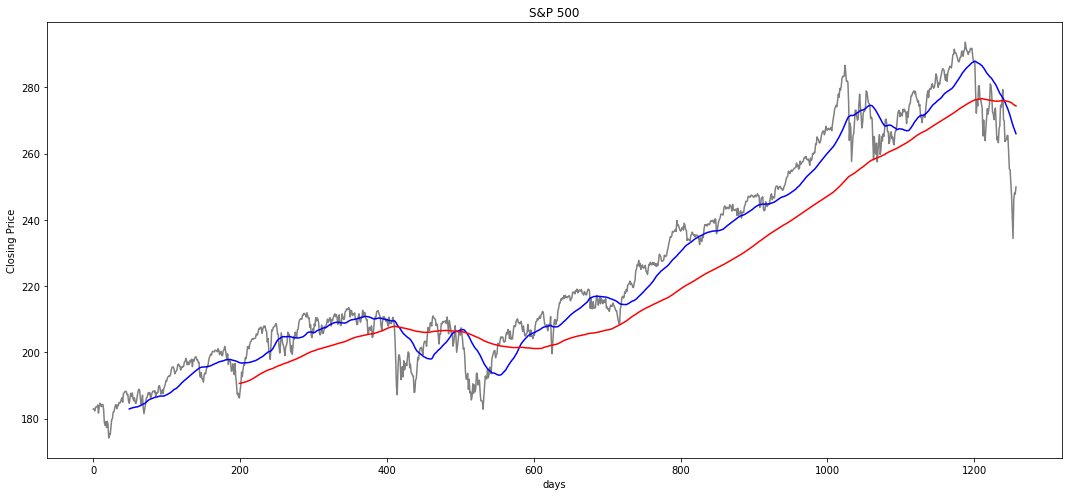

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(15, 7))

plt.plot(df_SPY['Close'], color="grey")
plt.plot(df_SPY['MA(50)'], color="blue")
plt.plot(df_SPY['MA(200)'], color="red")

plt.ylabel('Closing Price')
plt.xlabel('days')
plt.title('S&P 500')

plt.tight_layout()
plt.show()

## Answers 2 & 3: comparison of the 11 industry sub-sectors, and, the S&P 500

Here would have been the profit (or loss) percentage results of trading, based on Moving Average crossovers:

| Sector                  |   Profit %  |
| ------------------------|-------------|
| Materials               |    5.5%     |
| Energy                  |   -0.6%     |
| Financials              |    9.5%     |
| Industrials             |    7.0%     |
| Technology              |   20.4%     |
| Consumer Staples        |   21.9%     |
| Real Estate             |   -1.3%     |
| Utilities               |    6.3%     |
| Health Care             |    6.9%     |
| Consumer Discretionary  |   14.6%     |
| Telecommunications      |    5.2%     |
| S&P 500      |    9.8%     |

# FURTHER RESEARCH PROPOSITIONS

##  Proposal for a realistic future research project on this dataset, that would use some data science techniques you'd like to learn in the bootcamp

In the future, I'd like to run analyses on the other popular Technical Analysis tools, and hopefully identify the best, most consistently profitable tools.

A list of the most popular Technical Analysis tools, includes:

* Simple Moving Average
 
* Exponential Moving Average
 
* Volume Weighted Average Price
 
* Moving Average Convergence / Divergence
 
* Stochastic Oscillator
 
* Relative Strength Index
 
* Average Directional Movement Index
 
* Commodity Channel Index
 
* Aroon
 
* Bollinger Bands
 
* Chaikin A/D line
 
* On Balance Volume

## Present one or more clear questions

Some of the popular Technical Analysis tools may benefit from adaptation.

For example: should the Simple Moving Average quantity drivers (50 and 200) be changed ... depending on overall market conditions? or maybe, other statistical triggers?


## Describe the techniques you would apply in order to arrive at an answer

My intuition is that the "peak and valley" trend in the mathematical difference betwen MA(50) and MA(200), may be a more valuable driver than the "crossover".